In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls gdrive/MyDrive/ML

abalone.csv	    djia_index.csv	 perceptron-train.csv  titanic.csv
classification.csv  gbm-data.csv	 salary-test-mini.csv  wine.data
close_prices.csv    housing.data	 salary-train.csv      wine.names
comments.csv	    housing.names	 scores.csv
data-logistic.csv   perceptron-test.csv  svm-data.csv


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/ML/gbm-data.csv')

In [4]:
data.head(5)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataNum = data.to_numpy()

In [6]:
dataNum.shape

(3751, 1777)

In [7]:
dataNum

array([[1.        , 0.        , 0.49700901, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36666667, 0.60629148, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.0333    , 0.48012427, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.52056377, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.7656462 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13333333, 0.53395198, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
dataX = dataNum[:,1:]

In [9]:
dataY = dataNum[:,0:1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.8, random_state=241)

In [11]:
model = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1, n_estimators=250, random_state=241)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

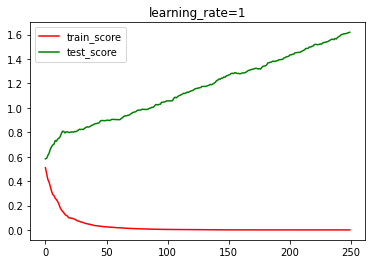

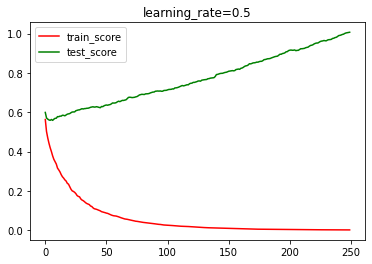

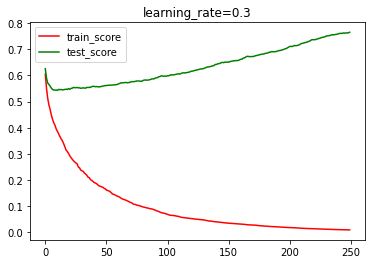

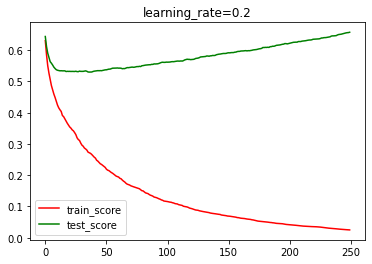

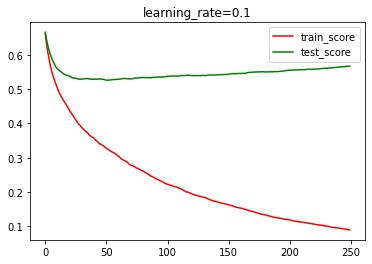

In [12]:
learning_data = pd.DataFrame()

for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    model = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=learning_rate)
    model.fit(X_train, y_train)

    train_score = np.empty(len(model.estimators_))
    test_score = np.empty(len(model.estimators_))

    for i, pred in enumerate(model.staged_decision_function(X_train)):
        pred = [(1 / (1 + np.exp(-x))) for x in pred]
        train_score[i] = log_loss(y_train, pred)

    for i, pred in enumerate(model.staged_decision_function(X_test)):
        pred = [(1 / (1 + np.exp(-x))) for x in pred]
        test_score[i] = log_loss(y_test, pred)

    learning_data[learning_rate] = test_score

    plt.figure()
    plt.title(f'learning_rate={learning_rate}')
    plt.plot(train_score, 'r')
    plt.plot(test_score, 'g')
    plt.legend(['train_score', 'test_score'])


переобучение

In [13]:
learning_data[0.2].min()

0.5301645204906471

In [16]:
ind = learning_data[learning_data[0.2] == learning_data[0.2].min()].index.values[0] + 1
ind

37

In [19]:
best_model = RandomForestClassifier(n_estimators=ind, random_state=241)
best_model.fit(X_train, y_train)

predict = best_model.predict_proba(X_test)
vall = log_loss(y_test, predict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [20]:
vall

0.5410941951182815

значение функции потерь случайного леса больше на 1% чем значение функции потерь у градиентного бустинга

In [30]:
from sklearn.metrics import accuracy_score
pred = best_model.predict(X_test)
accuracy_score(y_test, pred)

0.7314228590469843